In [1]:
import pandas as pd 
import numpy as np 

## Data Loading and Processing

In [2]:
Books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
Ratings = pd.read_csv('Ratings.csv')

C:\Users\o876\AppData\Local\Temp\ipykernel_9624\156986193.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv('Books.csv')


In [3]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
# Checking for missing values
print(Books.isnull().sum())
print(users.isnull().sum())
print(Ratings.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [8]:
# checking for duplicates
print(Books.duplicated().sum())
print(users.duplicated().sum())
print(Ratings.duplicated().sum())

0
0
0


In [22]:
# shape of all three datasets
print(Books.shape)
print(users.shape)
print(Ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


## EDA

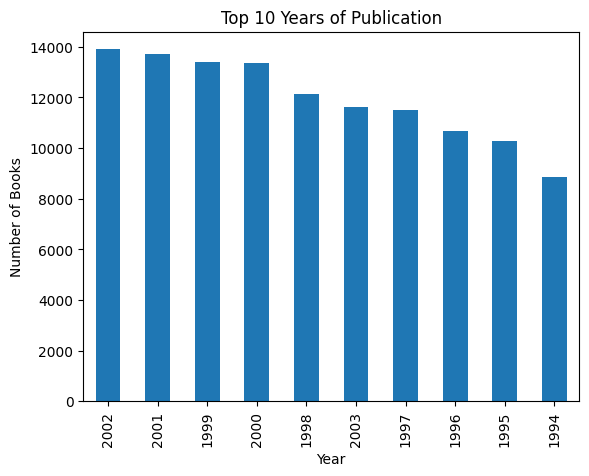

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Books['Year-Of-Publication'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Years of Publication')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

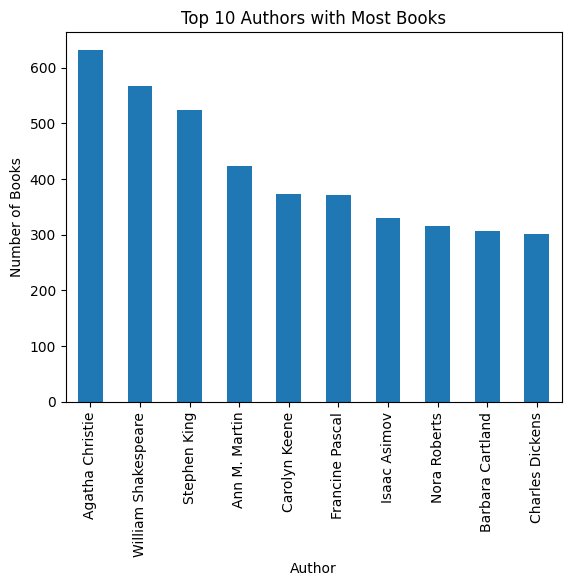

In [16]:
# Top 10 authors with most books
Books['Book-Author'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()


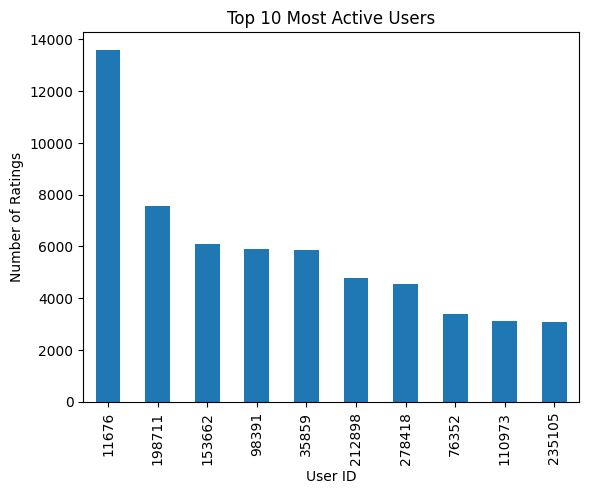

In [19]:
# Most active users
Ratings['User-ID'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

## Popularity Based System

In [24]:
books_ratings = Ratings.merge(Books, on='ISBN')
books_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [26]:
num_rating = books_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns={'Book-Rating':'Num_Ratings'},inplace=True)
num_rating.head(10)

,Book-Title,Num_Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
5,Clifford Visita El Hospital (Clifford El Gran...,1
6,Dark Justice,1
7,Deceived,2
8,Earth Prayers From around the World: 365 Pray...,10
9,Final Fantasy Anthology: Official Strategy Gu...,4


In [28]:
Avg_Ratings = books_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()
Avg_Ratings.rename(columns={'Book-Rating':'Avg_rating'},inplace=True)
Avg_Ratings.head(10)

,Book-Title,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,0.00
6,Dark Justice,10.00
7,Deceived,0.00
8,Earth Prayers From around the World: 365 Pray...,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,5.00


In [30]:
# Top 50 Popular Books
Popular_df = num_rating.merge(Avg_Ratings, on='Book-Title')
Popular_df = Popular_df[Popular_df['Num_Ratings']>=250].sort_values('Avg_rating', ascending=False).head(50)
Popular_df = Popular_df.merge(Books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Num_Ratings','Avg_rating']]
Popular_df

,Book-Title,Book-Author,Image-URL-M,Num_Ratings,Avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Collaboratiive Filtering

In [32]:
# users who rated more than 200 times
x = books_ratings.groupby('User-ID').count()['Book-Rating'] > 200
active_users= x[x].index

In [33]:
filtered_ratings = books_ratings[books_ratings['User-ID'].isin(active_users)]

In [ ]:
# Books with more than 50 ratings
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >=50
popular_books = y[y].index

In [35]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(popular_books)]

In [36]:
# pivot table with final data which contains books on index and users on columns
Pivot_table = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
Pivot_table.fillna(0,inplace=True)
Pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Measuring Similarity Using Cosine_Similarity

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(Pivot_table)

In [38]:
similarity.shape

(706, 706)

In [39]:
# function defined for recommendations
def recommend(book_name):
    Index = np.where(Pivot_table.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity[Index])), key= lambda x:x[1], reverse=True)[1:6]
    
    data = []
    for i in similar_books:
        item = []
        df = Books[Books['Book-Title']== Pivot_table.index[i[0]]]
        item.extend(list(df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
        
    return data

In [41]:
recommend("4 Blondes")

[['The House of the Spirits',
  'Isabel Allende',
  'http://images.amazon.com/images/P/0553273914.01.MZZZZZZZ.jpg'],
 ['Pride and Prejudice',
  'Jane Austen',
  'http://images.amazon.com/images/P/055321215X.01.MZZZZZZZ.jpg'],
 ['Pleading Guilty',
  'Scott Turow',
  'http://images.amazon.com/images/P/0446365505.01.MZZZZZZZ.jpg'],
 ['Seabiscuit',
  'LAURA HILLENBRAND',
  'http://images.amazon.com/images/P/0345465083.01.MZZZZZZZ.jpg'],
 ['Notes from a Small Island',
  'Bill Bryson',
  'http://images.amazon.com/images/P/0380727501.01.MZZZZZZZ.jpg']]

In [42]:

Books.drop_duplicates('Book-Title')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
import pickle

pickle.dump(Popular_df,open('popular_books.pkl','wb'))
pickle.dump(Pivot_table,open('books_users_pivot.pkl','wb'))
pickle.dump(Books,open('Books.pkl','wb'))
pickle.dump(similarity,open('cosine_similarity.pkl','wb'))  